In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("./data/1639639084.test_baa.pickle")

In [3]:
df

,id,with_low_rank,strategy,num_qubits,depth,cnots,entganglement,entganglement (MW),entganglement (min-MW),entganglement (max-MW),...,real_depth,real_depth_no_approx,real_fidelity_loss,real_fidelity_loss_benchmark,duration,benchmark_fidelity_loss_pass,approximation_calculation_pass,real_approximation_calculation_pass,cnot_prediction_calculation_pass,saved_cnots_calculation_pass
0,0,False,brute_force,7,14,84,0.324618,0.433566,[0.0],[0.1857814800223006],...,71,71,-0.0000,-0.0,0.875001,True,True,True,False,False
1,0,False,greedy,7,14,84,0.324618,0.433566,[0.0],[0.1857814800223006],...,42,71,-0.0000,-0.0,1.003100,True,True,True,False,True
2,0,True,brute_force,7,14,84,0.324618,0.433566,[0.0],[0.1857814800223006],...,42,71,0.0777,-0.0,1.265692,True,True,True,False,True
3,0,True,greedy,7,14,84,0.324618,0.433566,[0.0],[0.1857814800223006],...,42,71,-0.0000,-0.0,1.250030,True,True,True,False,True
4,0,False,brute_force,7,14,84,0.324618,0.433566,[0.0],[0.1857814800223006],...,17,71,0.1861,-0.0,0.687472,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,999,True,greedy,7,7,36,0.135922,0.139868,[0.0],[0.11380923692914993],...,2,13,0.1359,0.0,0.109373,True,True,True,False,True
39996,999,False,brute_force,7,7,36,0.135922,0.139868,[0.0],[0.11380923692914993],...,2,13,0.1359,0.0,0.109375,True,True,True,False,True
39997,999,False,greedy,7,7,36,0.135922,0.139868,[0.0],[0.11380923692914993],...,2,13,0.1359,0.0,0.078689,True,True,True,False,True
39998,999,True,brute_force,7,7,36,0.135922,0.139868,[0.0],[0.11380923692914993],...,2,13,0.1359,0.0,0.124999,True,True,True,False,True


In [4]:
df_bf = df[df.with_low_rank & (df.strategy == 'brute_force')][['id', 'entganglement', 'total_fidelity_loss', 'max_fidelity_loss', 'total_saved_cnots']] \
    .set_index(['id', 'max_fidelity_loss'])

In [5]:
df_g = df[df.with_low_rank & (df.strategy == 'greedy')][['id', 'total_fidelity_loss', 'max_fidelity_loss', 'total_saved_cnots']] \
    .set_index(['id', 'max_fidelity_loss'])

In [6]:
df_joined = df_bf.join(df_g, rsuffix='_greedy')
df_joined

entganglement  total_fidelity_loss  total_saved_cnots  \
id  max_fidelity_loss                                                          
0   0.1                     0.324618             0.000000                 70   
    0.2                     0.324618             0.186141                 79   
    0.3                     0.324618             0.268274                 83   
    0.4                     0.324618             0.324618                 84   
    0.5                     0.324618             0.324618                 84   
...                              ...                  ...                ...   
999 0.6                     0.135922             0.135922                 36   
    0.7                     0.135922             0.135922                 36   
    0.8                     0.135922             0.135922                 36   
    0.9                     0.135922             0.135922                 36   
    1.0                     0.135922             0.135922                 36   

                       total_fidelity_loss_greedy  total_saved_cnots_greedy  
id  max_fidelity_loss                                                        
0   0.1                                  0.000000                        63  
    0.2                                  0.127464                        77  
    0.3                                  0.239492                        80  
    0.4                                  0.324618                        84  
    0.5                                  0.324618                        84  
...                                           ...                       ...  
999 0.6                                  0.135922                        36  
    0.7                                  0.135922                        36  
    0.8                                  0.135922                        36  
    0.9                                  0.135922                        36  
    1.0                                  0.135922                        36  

[10000 rows x 5 columns]

<AxesSubplot:ylabel='Frequency'>

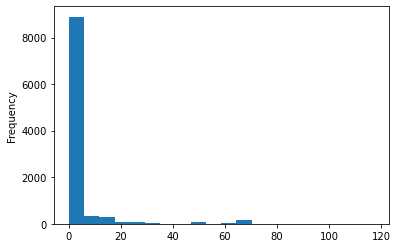

In [7]:
(df_joined.total_saved_cnots - df_joined.total_saved_cnots_greedy).plot.hist(bins=20)

In [29]:
plt.rcParams["font.family"] = "times new roman"
plt.rcParams["font.size"] = 18

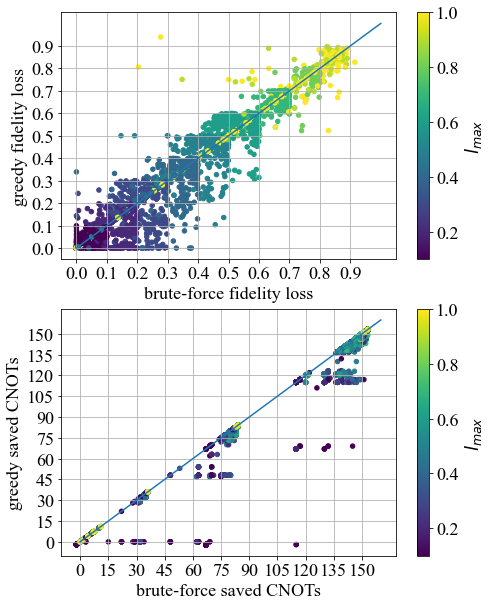

In [31]:
fig, ax = plt.subplots(2, 1, figsize=(7.5, 10))
df_joined.reset_index()[['total_fidelity_loss', 'total_fidelity_loss_greedy', 'max_fidelity_loss']].rename(columns={'max_fidelity_loss': '$l_{max}$'}).plot.scatter(
    x=0, y=1, c=2, colormap='viridis', ax=ax[0], grid=True, xticks=np.arange(0, 1, 0.1), yticks=np.arange(0, 1, 0.1),
    xlabel='brute-force fidelity loss', ylabel='greedy fidelity loss'
)
ax[0].plot([0, 1], [0, 1])
df_joined.reset_index()[['total_saved_cnots', 'total_saved_cnots_greedy', 'max_fidelity_loss']].rename(columns={'max_fidelity_loss': '$l_{max}$'}).plot.scatter(
    x=0, y=1, c=2, colormap='viridis', ax=ax[1], grid=True, xticks=np.arange(0, 160, 15), yticks=np.arange(0, 160, 15),
    xlabel='brute-force saved CNOTs', ylabel='greedy saved CNOTs'
)
ax[1].plot([0, 160], [0, 160])
fig.savefig('greedy vs brute-force.pdf')

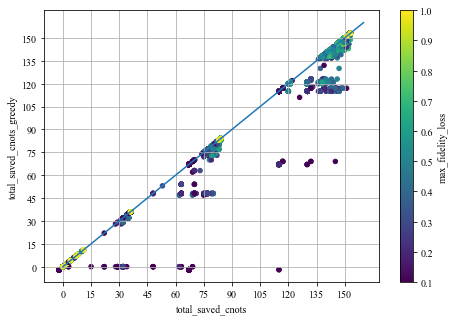

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))
df_joined.reset_index()[['total_saved_cnots', 'total_saved_cnots_greedy', 'max_fidelity_loss']].plot.scatter(
    x=0, y=1, c=2, colormap='viridis', ax=ax, grid=True, xticks=np.arange(0, 160, 15), yticks=np.arange(0, 160, 15)
)
plt.plot([0, 160], [0, 160])
plt.savefig('total_saved_cnots_comaprison.svg')

In [58]:
df_joined.xs(level=1, key=1.0)

,entganglement,total_fidelity_loss,total_saved_cnots,total_fidelity_loss_greedy,total_saved_cnots_greedy
id,,,,,
0,0.324618,0.324618,84,0.324618,84
1,0.000000,0.000000,0,0.000000,0
2,0.826186,0.883047,151,0.826195,151
3,0.548289,0.548289,151,0.548289,151
4,0.000000,0.000000,0,0.000000,0
...,...,...,...,...,...
995,0.557524,0.557520,151,0.557539,151
996,0.000000,0.000000,0,0.000000,0
997,0.482265,0.482254,36,0.482249,36


# CNOT reduction analysis

,error,error,error,error,error,error,error,error
,count,mean,std,min,25%,50%,75%,max
max_fidelity_loss,,,,,,,,
0.1,1000.0,17.19,27.68624980795392,0.0,0.0,0.0,28.25,117.0
0.2,1000.0,4.109,10.268230400393028,0.0,0.0,0.0,0.0,62.0
0.30000000000000004,1000.0,3.239,8.818256099742207,0.0,0.0,0.0,0.0,48.0
0.4,1000.0,2.121,5.422523652577531,0.0,0.0,0.0,0.0,32.0
0.5,1000.0,2.06,4.385616676550019,0.0,0.0,0.0,2.0,29.0
0.6,1000.0,2.047,4.036717241284815,0.0,0.0,0.0,2.0,22.0
0.7000000000000001,1000.0,0.667,1.5743537053628036,0.0,0.0,0.0,1.0,17.0
0.8,1000.0,0.392,0.9865643969398598,0.0,0.0,0.0,0.0,6.0
0.9,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



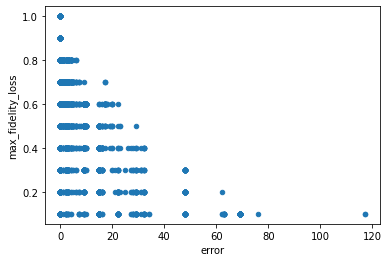

In [112]:
cnot_df = df_joined.reset_index()[['total_saved_cnots', 'total_saved_cnots_greedy', 'max_fidelity_loss']]
cnot_df['error'] = cnot_df.total_saved_cnots - cnot_df.total_saved_cnots_greedy
cnot_df.plot.scatter(x=3, y=2)
print(cnot_df[['error', 'max_fidelity_loss']].groupby('max_fidelity_loss').describe().to_csv())

max_fidelity_loss
0.1    AxesSubplot(0.1,0.15;0.8x0.75)
0.2    AxesSubplot(0.1,0.15;0.8x0.75)
0.3    AxesSubplot(0.1,0.15;0.8x0.75)
0.4    AxesSubplot(0.1,0.15;0.8x0.75)
0.5    AxesSubplot(0.1,0.15;0.8x0.75)
0.6    AxesSubplot(0.1,0.15;0.8x0.75)
0.7    AxesSubplot(0.1,0.15;0.8x0.75)
0.8    AxesSubplot(0.1,0.15;0.8x0.75)
0.9    AxesSubplot(0.1,0.15;0.8x0.75)
1.0    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

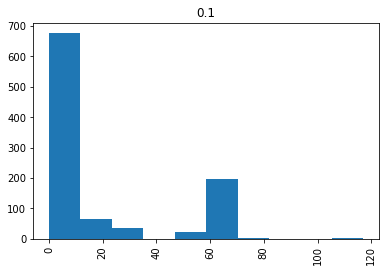

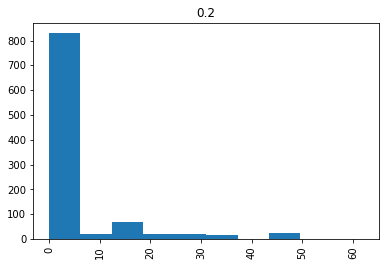

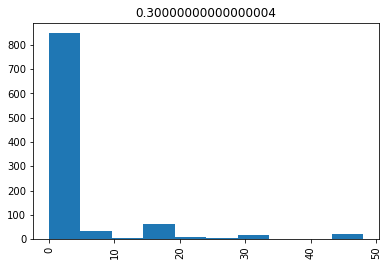

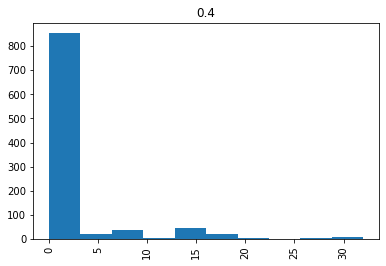

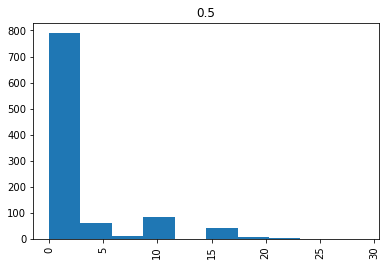

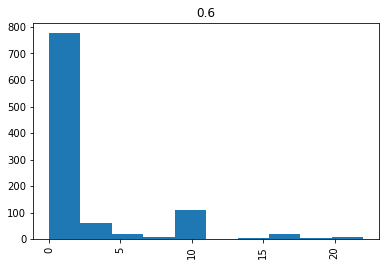

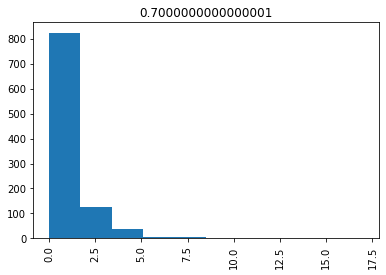

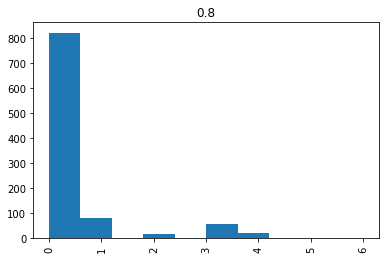

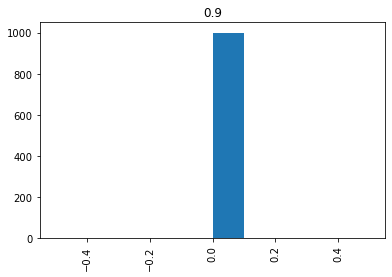

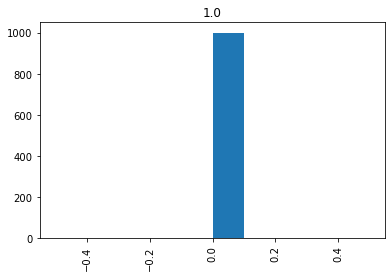

In [119]:
cnot_df[['error', 'max_fidelity_loss']].groupby('max_fidelity_loss').hist('error', by='max_fidelity_loss')

# Fidelity Loss Analysis

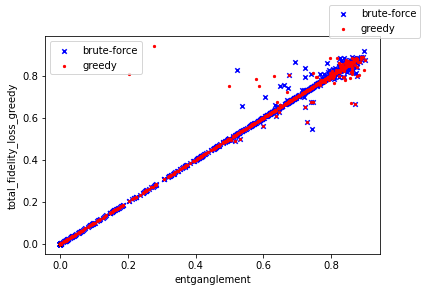

In [64]:
fig, ax = plt.subplots(1, 1)
df_joined.xs(level=1, key=1.0).plot.scatter(x=0, y=1, c='blue', ax=ax, label='brute-force', marker='x')
df_joined.xs(level=1, key=1.0).plot.scatter(x=0, y=3, c='red', ax=ax, label='greedy', marker='.')
fig.legend()
fig.savefig("")

<AxesSubplot:xlabel='entganglement', ylabel='error_g'>

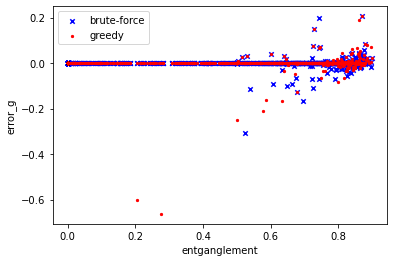

In [97]:
entanglement_df = df_joined.xs(level=1, key=1.0).copy()
# print(entanglement_df.columns)
entanglement_df.set_index('entganglement', inplace=True)
# entanglement_df[entanglement_df.entganglement > 0.85]
entanglement_df['error_bf'] = entanglement_df.index - entanglement_df.total_fidelity_loss
entanglement_df['error_g'] = entanglement_df.index - entanglement_df.total_fidelity_loss_greedy

fig, ax = plt.subplots(1, 1)
ax.set_ylabel('error')
entanglement_df.reset_index().plot.scatter(x='entganglement', y='error_bf', c='blue', ax=ax, label='brute-force', marker='x')
entanglement_df.reset_index().plot.scatter(x='entganglement', y='error_g', c='red', ax=ax, label='greedy', marker='.')
# fig.legend()

In [98]:
entanglement_df[['error_bf', 'error_g']].describe()

,error_bf,error_g
count,1000.000000,1000.000000
mean,-0.000430,-0.001018
std,0.019579,0.034310
min,-0.305192,-0.663100
25%,-0.000002,-0.000002
50%,0.000000,0.000000
75%,0.000003,0.000002
max,0.205965,0.205965
